
##Problem Definition
 When a person want to sell or buy a house , facing an issue like without knowing the worth of house, house may be sold or bought underestpimate price or over price, to overcome the issue we analyse with availble feature and predict price. "
 ## Objective",
  "Build model which will predict the house price when required features passed to the model. So we will"

Find out the significant features from the given features dataset which affects the house price the most
There are certain set of feature values given in the problem statement. The feature values are given below
1. cid: a notation for a house 
2. dayhours: Date house was sold 
3. price: Price is prediction target 
4. room_bed: Number of Bedrooms/House
5. room_bath: Number of bathrooms/bedrooms
6. living_measure: square footage of the home 
7. lot_measure: quare footage of the lot
8. ceil: Total floors (levels) in house
9. coast: House which has a view to a waterfront 
10. sight: Has been viewed 
11. condition: How good the condition is (Overall) 
12. quality: grade given to the housing unit, based on grading system 
13. ceil_measure: square footage of house apart from basement 
14. basement_measure: square footage of the basement 
15. yr_built: Built Year 
16. yr_renovated: Year when house was renovated 
17. zipcode: zip 
18. lat: Latitude coordinate 
19. long: Longitude coordinate 
20. living_measure15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area 
21. lot_measure15: lotSize area in 2015(implies-- some renovations) 
22. furnished: Based on the quality of room 
23. Total_area: Measure of both living and lot 


*The model is useful for the users/owners who want to see the flat. So according to the data provided we have to build the model to give the seller fair idea(not much not less) of the price to sell the flat.*


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
data=pd.read_csv('innercity.csv')

In [21]:
data.head(5)

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,5,9,3020,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,3,8,1750,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,3,8,2370,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,4,6,820,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,4,8,1400,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


In [22]:
# Size of the data set
data.shape

(21613, 23)

In [23]:
# let's check whether our dataset have any null/missing values
data.isnull().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [24]:
##  Know more about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  int64  
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  int64  
 6   lot_measure       21613 non-null  int64  
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  int64  
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [25]:
## Finding out the duplicates in the cid column
dups= data.pivot_table(index=['cid'], aggfunc = 'size') # Checking the repition of elements

In [26]:
data[data['cid']==795000620]
## before dropping duplicates the frequency of the cid=795000620

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
1634,795000620,20140924T000000,115000,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,0,7330
15184,795000620,20141215T000000,124000,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,0,7330
20544,795000620,20150311T000000,157000,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,0,7330


In [27]:
#cid - CID is appearing muliple times, it seems data contains house which is sold multiple times
cid_count=data.cid.value_counts()
cid_count[cid_count>1].shape

(176,)

In [28]:
data1= data.drop_duplicates(subset=['cid'])

In [29]:
data1[data['cid']==795000620]
## To check that it drops the elements in the cid columns, Hence it remove the botton two rows

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
1634,795000620,20140924T000000,115000,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,0,7330


In [30]:
data1.shape ## As you check that duplicates rows are removed

(21436, 23)

In [31]:
## Univariate Analysis

In [32]:
data1.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

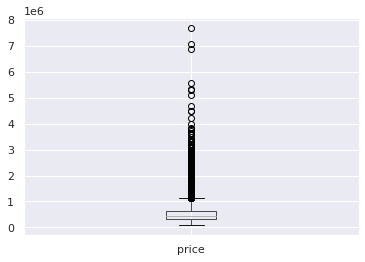

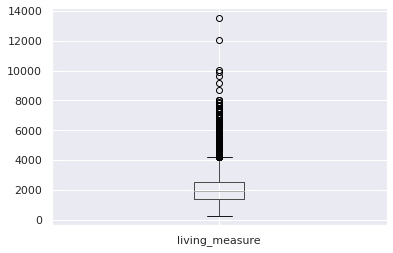

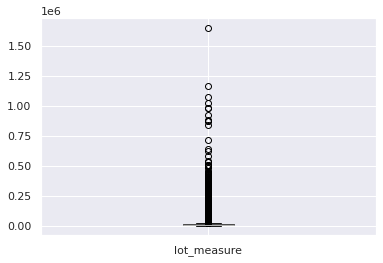

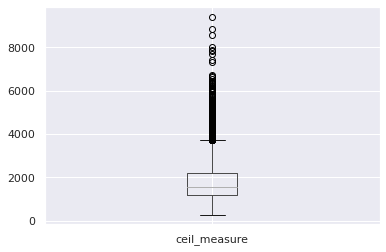

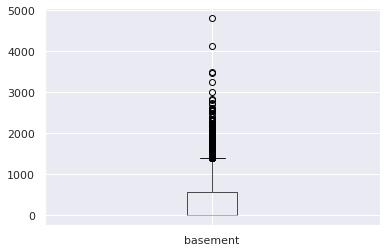

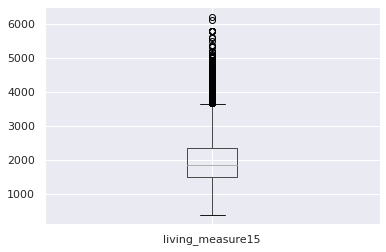

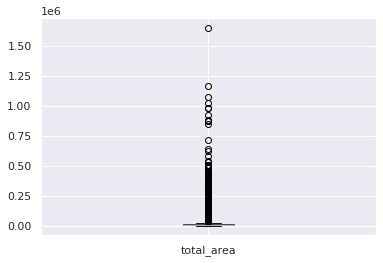

In [124]:
## Just to have fast glimpse of min, max range we are having this quick look by using univariate box plot
# size of plots to make it uniform throughout our analysis in the notebook
# It will give clear picture of no of outliers in system and the limit range
## Ceil, coast, sight,condition and funished are discrete variable
columns=['price','living_measure','lot_measure','ceil_measure','basement','living_measure15','total_area']
plotSizeX = 12
plotSizeY = 6
# let's boxplot all the numerical columns and see if there any outliers
for i in columns:
    data.iloc[:, 1:].boxplot(column=i)
    plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

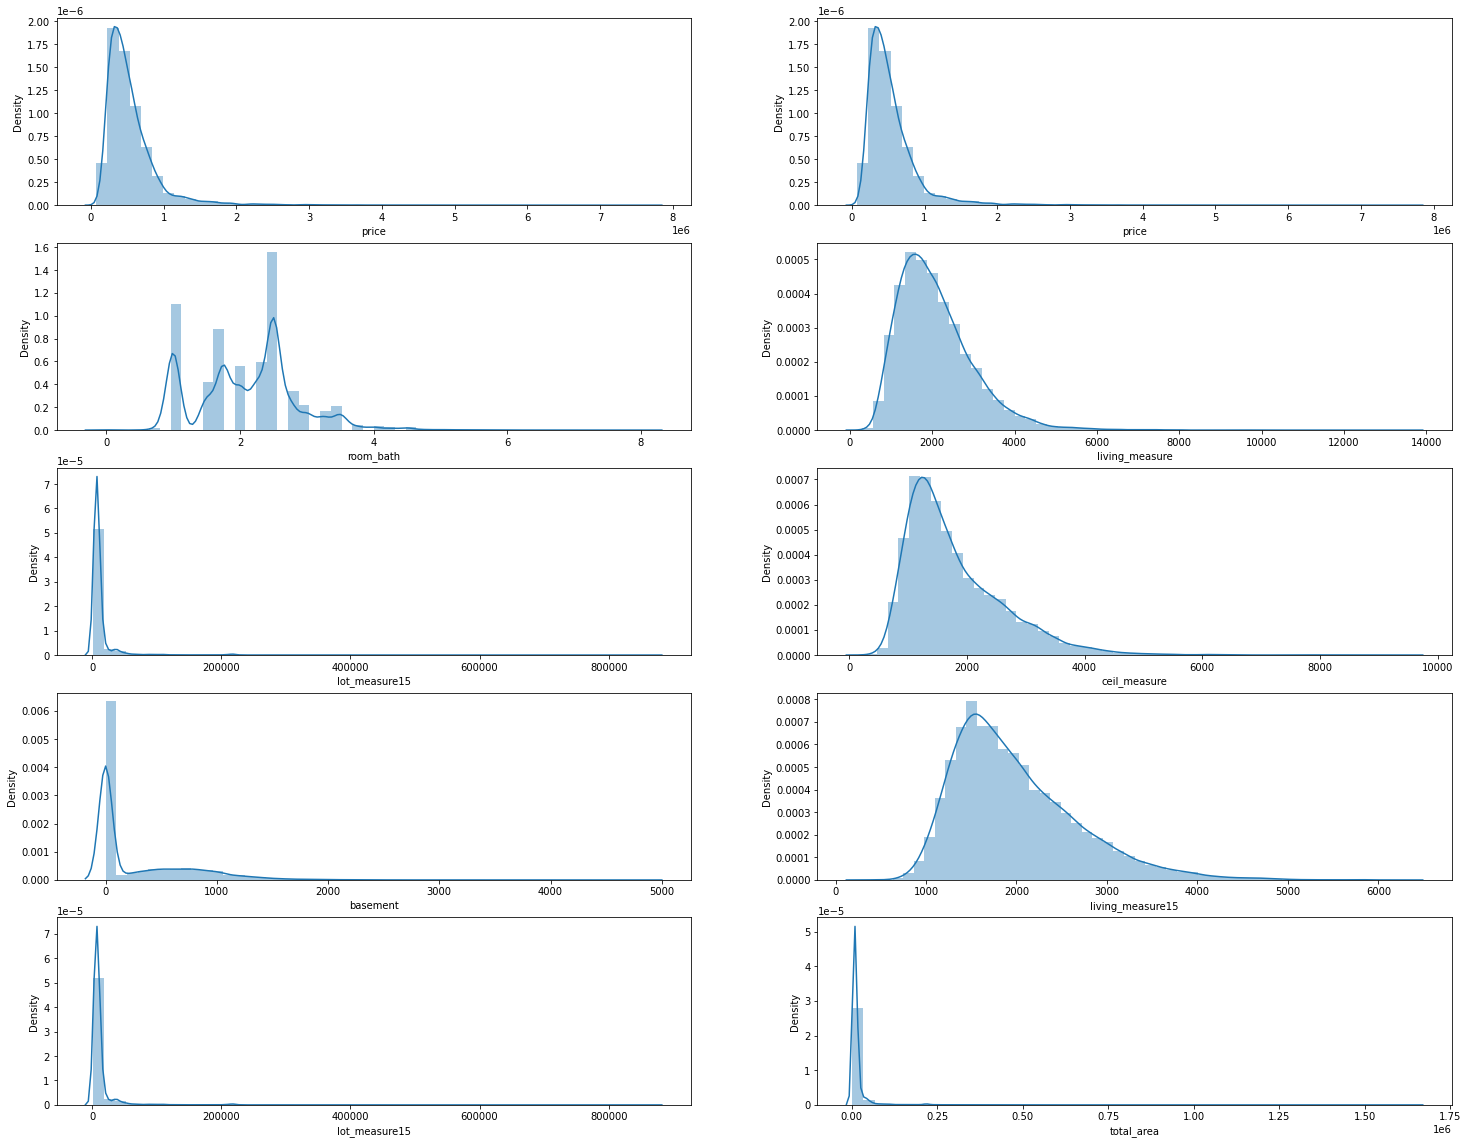

In [34]:
## Have a look at the dist plot in the continous variables
fig, ax= plt.subplots(5, 2, figsize=(25, 20))
sns.distplot(data1['price'],ax=ax[0][0])
sns.distplot(data1['price'],ax=ax[0][1])
sns.distplot(data1['room_bath'],ax=ax[1][0])
sns.distplot(data1['living_measure'],ax=ax[1][1])
sns.distplot(data1['lot_measure15'],ax=ax[2][0])
sns.distplot(data1['ceil_measure'],ax=ax[2][1])
sns.distplot(data1['basement'],ax=ax[3][0])
sns.distplot(data1['living_measure15'],ax=ax[3][1])
sns.distplot(data1['lot_measure15'],ax=ax[4][0])
sns.distplot(data1['total_area'],ax=ax[4][1])

In [ ]:
## Price is left skewed
##Room_bath has multiple gauusian peaks
## Living measure also left skewed
##lot_measure15 normally distributed
## ceil_measure is left skewed
## Basement is right skewed
## living_measure15 is left skewed

In [35]:
## Have a look at the discret variables
data1['room_bed'].value_counts()

3     9731
4     6849
2     2736
5     1586
6      265
1      194
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: room_bed, dtype: int64

In [79]:
data1[data1['room_bed']==33]

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
750,2402100895,20140625T000000,640000,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,68,0,98103,47.6878,-122.331,1330,4700,0,7620


In [88]:
data1[data1['room_bed']==9]

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
1745,2902200015,20150106T000000,700000,9,3.0,3680,4400,2.0,0,0,3,7,2830,850,107,0,98102,47.6374,-122.324,1960,2450,0,8080
7396,9822700190,20140808T000000,1280000,9,4.5,3650,5000,2.0,0,0,3,8,2530,1120,100,2010,98105,47.6604,-122.289,2510,5000,0,8650
11950,8823901445,20150313T000000,934000,9,3.0,2820,4480,2.0,0,0,3,7,1880,940,97,0,98105,47.6654,-122.307,2460,4400,0,7300
14687,424049043,20140811T000000,450000,9,7.5,4050,6504,2.0,0,0,3,7,4050,0,19,0,98144,47.5923,-122.301,1448,3866,0,10554
20750,8823900290,20150317T000000,1400000,9,4.0,4620,5508,2.5,0,0,3,11,3870,750,100,0,98105,47.6684,-122.309,2710,4320,1,10128
21036,1997200215,20140507T000000,599999,9,4.5,3830,6988,2.5,0,0,3,7,2450,1380,77,0,98103,47.6927,-122.338,1460,6291,0,10818


In [80]:
data1['room_bed'].describe()

count    21436.000000
mean         3.371571
std          0.929205
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: room_bed, dtype: float64

In [81]:
data1['price'].describe()

count    2.143600e+04
mean     5.411958e+05
std      3.677302e+05
min      7.500000e+04
25%      3.230000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [37]:
### There can't be any 33,11,10,9 rooms and also hence removing it

In [90]:
data1.shape

(21436, 23)

In [95]:
data1.drop(data1[ (data1.room_bed == 33)|((data1.room_bed == 11)|(data1.room_bed == 10)|(data1.room_bed ==9)) ].index, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [96]:
data1.shape

(21425, 23)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    19320
2      962
3      507
1      331
4      316
Name: sight, dtype: int64

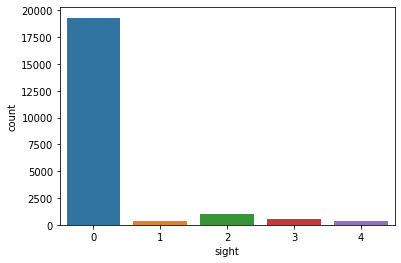

In [38]:
## As it is categorical value Let's look at the count plot to see the counts
c=data1['sight'].value_counts().sort_values(ascending= False)
sns.countplot(data1['sight'])
c

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    21273
1      163
Name: coast, dtype: int64

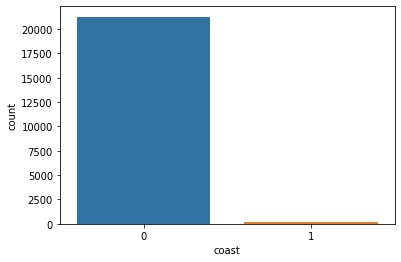

In [39]:
c=data1['coast'].value_counts().sort_values(ascending= False)
sns.countplot(data1['coast']) ## As it is categorical value Let's look at the count plot to see the counts
c

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


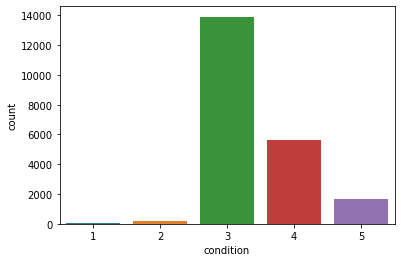

In [40]:
c=sns.countplot(data1['condition'])
## As it is categorical value Let's look at the count plot to see the counts
data1['condition'].value_counts().sort_values(ascending= False)
c

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    17202
1     4234
Name: furnished, dtype: int64

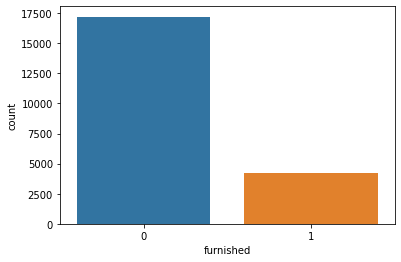

In [41]:
sns.countplot(data1['furnished'])
## As it is categorical value Let's look at the count plot to see the counts
data1['furnished'].value_counts().sort_values(ascending= False)

In [42]:
## Room_bed is discrete variable with few outliers ie. 33,11,10,9
## Ceil, coast, sight,condition and funished are discrete variable
## Iat(Latitude) and long(longitude) has no importance, & zipcode is sufficient
## Yr reinovated and yr built has no significance until and unless its modified 

In [43]:
## Let's modify the yr_built as the no of year of the construction of house till the final year
data1['yr_built']= 2015 - data1['yr_built']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Bivariate Analysis

In [44]:
## Bivariate analysis
## Target is to find the relation of different variables on the price as well as among the different columns
## For discrete data type we will see other types of plot to see the relation to infer the output pattern

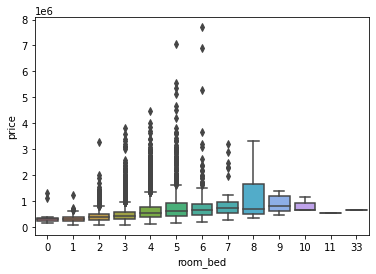

In [45]:
sns.boxplot(x='room_bed',y='price',data=data1)
## 33 bed no is obviously outlier dropping that partcular row and we can also see there is no relation between no of room_bed and price
data_new=data1[data1['room_bed'] != 33]
## Plot indicates as room_bed increases the price also increases

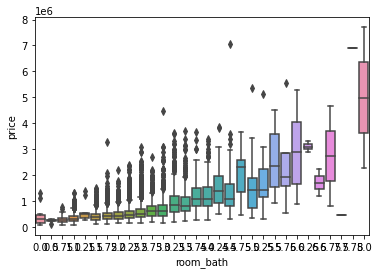

In [46]:
sns.boxplot(x='room_bath',y='price',data=data_new)
## The prices increases on increasing the no of room_bath

0.7016507541567069


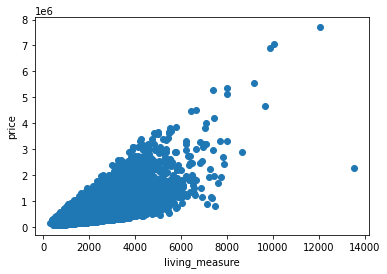

In [47]:
#'living_measure' is a continous variable
plt.scatter(data_new['living_measure'], data_new['price'])
plt.xlabel('living_measure')
plt.ylabel('price')
## Hence it can be seen that as living measure increases the price also increases
corr1=data_new['living_measure'].corr(data_new['price'])
print(corr1)## Hence can be seen high correlation between living_measure and price
####The point between 12000 and 14000 seems to be ouliers let's check other feature which are making it on lower price 
# if it is significant else remove that

In [48]:
## Lot measure and Area are continous we have to calculate correlation of both of them as they both indicate the unit of dimensions in the dataframe
## High correlation hence one can be removed in final model building
corr2=data_new['lot_measure'].corr(data_new['total_area'])
print(corr2)

0.9997643083555376


In [49]:
data_new=data_new.drop("lot_measure",axis=1);##Dropping off the lot measure column

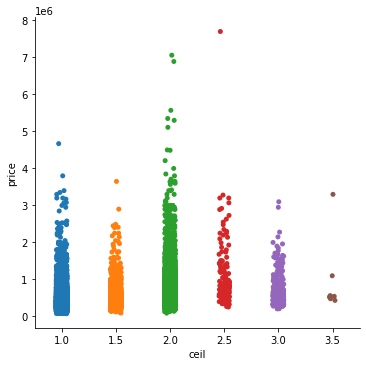

In [100]:
sns.catplot(x='ceil',y='price',data=data_new)
#### There is one value in the price columns where ceil= 2.5, it can be treated as outlier

In [105]:
data1[data1['ceil']==2.5]

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
146,9528100899,20150428T000000,827000,3,2.50,1850,1330,2.5,0,0,3,9,1560,290,11,0,98115,47.6831,-122.325,1810,2071,1,3180
343,6821102317,20141209T000000,535000,3,2.50,1850,1499,2.5,0,0,3,9,1790,60,10,0,98199,47.6475,-122.396,1770,1539,1,3349
551,1024049024,20141203T000000,1740000,5,3.50,4870,7700,2.5,0,3,5,10,3650,1220,86,0,98144,47.5832,-122.290,3220,7700,1,12570
763,9268851670,20150424T000000,645000,3,2.50,2170,1984,2.5,0,0,3,8,2170,0,7,0,98027,47.5401,-122.027,2150,1984,0,4154
897,9831200520,20141006T000000,1440000,4,3.00,3720,5000,2.5,0,0,5,9,2720,1000,110,0,98102,47.6282,-122.322,2610,5000,1,8720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21256,4021100095,20150121T000000,290000,4,1.75,1820,22043,2.5,0,0,4,7,1820,0,97,0,98155,47.7606,-122.280,1880,19961,0,23863
21272,9268851800,20140505T000000,415000,3,2.25,1620,998,2.5,0,0,3,8,1540,80,5,0,98027,47.5401,-122.027,1620,1299,0,2618
21572,8043700105,20150417T000000,2300000,4,4.00,4360,8175,2.5,1,4,3,10,3940,420,8,0,98008,47.5724,-122.104,2670,8525,1,12535
21579,4141800215,20141126T000000,1500000,4,3.75,3770,4000,2.5,0,0,5,9,2890,880,99,0,98122,47.6157,-122.287,2800,5000,1,7770


In [102]:
data1[data1['ceil']==2.5].describe()

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
count,1.590000e+02,1.590000e+02,159.000000,159.00000,159.000000,159.000000,159.0,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,4.567588e+09,1.061788e+06,3.924528,2.81761,3131.849057,17486.905660,2.5,0.012579,0.515723,3.484277,8.893082,2785.201258,346.647799,53.251572,226.314465,98092.358491,47.585403,-122.242912,2353.075472,17267.591195,0.566038,20618.754717
std,2.916106e+09,8.630544e+05,1.070592,0.87858,1438.181346,41926.403074,0.0,0.111799,1.107257,0.701313,1.305253,1100.522631,541.177585,44.800962,635.422875,51.538026,0.106354,0.134495,735.781859,48222.851820,0.497186,42174.267135
min,1.200691e+08,2.550000e+05,1.000000,1.00000,990.000000,736.000000,2.5,0.000000,0.000000,3.000000,6.000000,880.000000,0.000000,1.000000,0.000000,98001.000000,47.196000,-122.408000,1030.000000,1068.000000,0.000000,1726.000000
25%,1.957201e+09,5.500000e+05,3.000000,2.25000,2165.000000,2880.000000,2.5,0.000000,0.000000,3.000000,8.000000,1960.000000,0.000000,8.500000,0.000000,98040.000000,47.544600,-122.333500,1755.000000,3237.500000,0.000000,5886.000000
50%,3.751602e+09,7.992000e+05,4.000000,2.50000,2850.000000,5400.000000,2.5,0.000000,0.000000,3.000000,9.000000,2710.000000,0.000000,36.000000,0.000000,98109.000000,47.618100,-122.294000,2240.000000,5352.000000,1.000000,8720.000000
75%,7.181150e+09,1.285000e+06,4.000000,3.25000,3736.000000,9086.000000,2.5,0.000000,0.000000,4.000000,10.000000,3405.000000,555.000000,105.000000,0.000000,98120.500000,47.644200,-122.144000,2790.000000,7851.000000,1.000000,12838.000000
max,9.831201e+09,7.700000e+06,7.000000,8.00000,12050.000000,237402.000000,2.5,1.000000,4.000000,5.000000,13.000000,8570.000000,3480.000000,115.000000,2014.000000,98199.000000,47.761300,-121.932000,4470.000000,326097.000000,1.000000,240922.000000


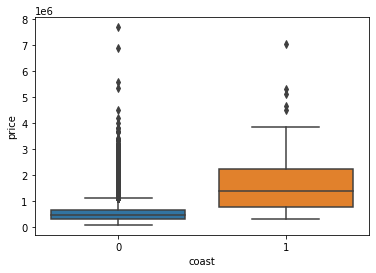

In [106]:
sns.boxplot(x='coast',y='price',data=data_new)
# As coast view is present the price increases

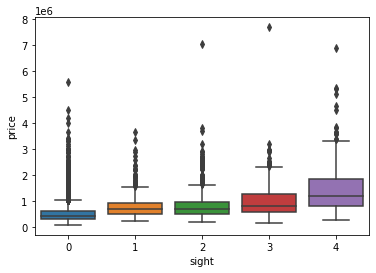

In [52]:
sns.boxplot(x='sight',y='price',data=data_new)
#### There are one value which have much high value where sight =0,2,3 and  4
##The houses which are viewed maximum no of times has high price range

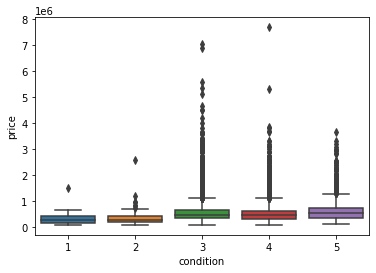

In [53]:
sns.boxplot(x='condition',y='price',data=data_new)
#### There are one value which have much high value where sight =0,2,3 and  4
## Else there is slight positive relation(it seems) as such in the conditions and value,  
## As the condition(overall) rating increases the prices also got increased

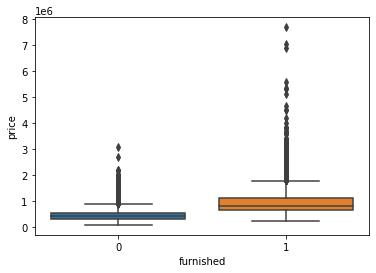

In [54]:
sns.boxplot(x='furnished',y='price',data=data_new)
## The furnished house has more price & clearly depicted in the below figure

In [ ]:
sns.set(color_codes=True)
sns.boxplot(x='quality',y='price',data=data_new)
## As the quality increases the price also increases

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


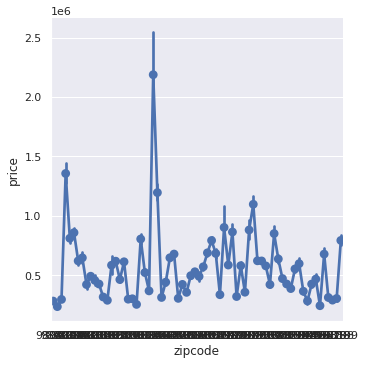

In [135]:
sns.factorplot(x='zipcode',y='price',data=data_new)
## specific zipcode(areas) have high price

In [56]:
#we will create new data frame that can be used for modeling
#We will convert the dayhours to 'month_year' as sale month-year is relevant for analysis
house_dfr=data_new.copy() ## In case we needed in the future
data_new.dayhours=data_new.dayhours.str.replace('T000000', "")
data_new.dayhours=pd.to_datetime(data_new.dayhours,format='%Y%m%d')
data_new['month_year']=data_new['dayhours'].apply(lambda x: x.strftime('%B-%Y'))
data_new['month_year'].head()

0    November-2014
1    December-2014
2       April-2015
3         May-2014
4       April-2015
Name: month_year, dtype: object

In [57]:
data_new['month_year'].value_counts()

April-2015        2210
July-2014         2204
June-2014         2164
August-2014       1923
October-2014      1866
March-2015        1854
September-2014    1761
May-2014          1761
December-2014     1454
November-2014     1396
February-2015     1235
January-2015       968
May-2015           639
Name: month_year, dtype: int64

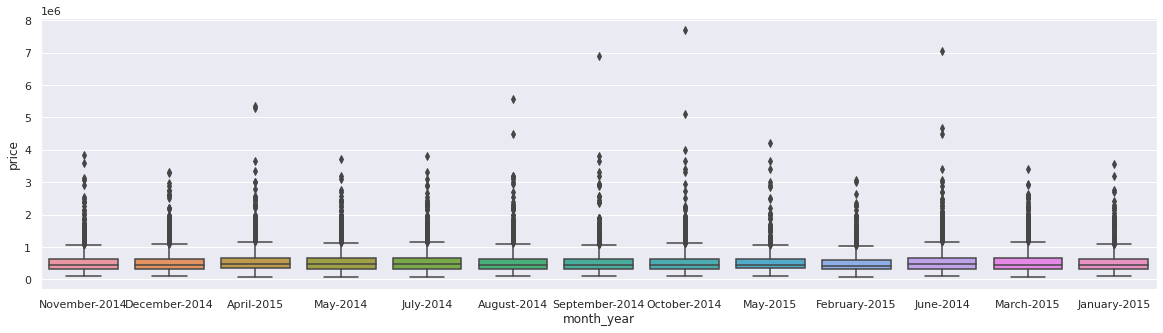

In [116]:
sns.set(color_codes=True)
plt.figure(figsize=(20,5))
sns.boxplot(x='month_year',y='price',data=data_new)
## There is no relation between price and the time of year it sold

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


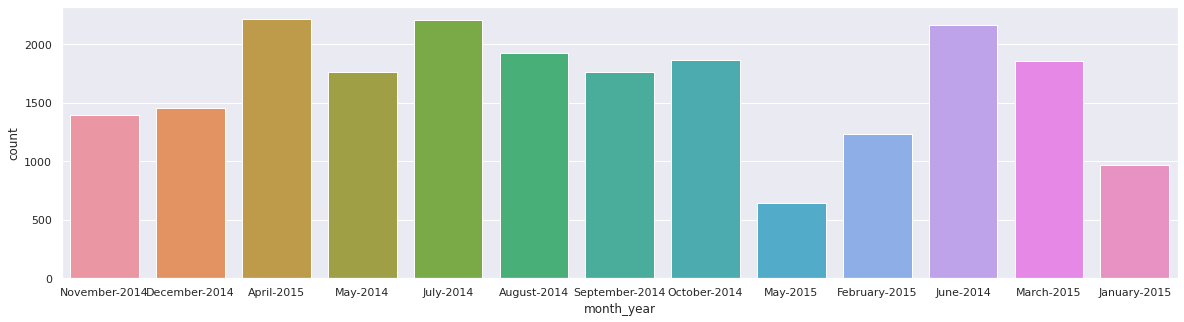

In [121]:
plt.figure(figsize=(20,5))
sns.countplot(data_new['month_year'])
## The house sold in  may'15 and jan'15 have less frequency to be sold

In [58]:
data_new.groupby(['month_year'])['price'].agg('mean')
## To see if there is a relation between between the month_year and the price
## But it seems there is no relation between both
#### I think we should drop this month_year column

month_year
April-2015        563229.323982
August-2014       537894.309412
December-2014     524978.649243
February-2015     508730.893927
January-2015      526621.446281
July-2014         545731.205989
June-2014         558900.170980
March-2015        543390.321467
May-2014          548957.154458
May-2015          559461.424100
November-2014     523412.287966
October-2014      540976.744909
September-2014    531460.377626
Name: price, dtype: float64

In [59]:
data_new.head(1)

,cid,dayhours,price,room_bed,room_bath,living_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,month_year
0,3034200666,2014-11-07,808100,4,3.25,3020,1.0,0,0,5,9,3020,0,59,0,98133,47.7174,-122.336,2120,7553,1,16477,November-2014


-0.05180691505711565

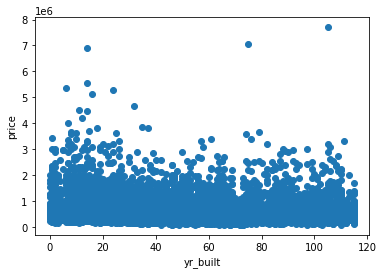

In [60]:
plt.scatter(data_new['yr_built'],data_new['price'])
plt.xlabel('yr_built')
plt.ylabel('price')
corr2=data_new['yr_built'].corr(data_new['price'])
corr2

In [61]:
data_new=data_new.drop("yr_built",axis=1);##Dropping off the yr_built column as Absolutely no correlation

In [62]:
## Let's watch closely column yr_renovated
data_new['yr_renovated'].describe()

count    21435.000000
mean        84.733753
std        402.439983
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [63]:
## Changing column element to 1 if it is renovated else taking it to 0
for i in range(1,len(data_new['yr_renovated'])):
  if (data_new['yr_renovated'].iloc[i]>0):
    data_new['yr_renovated'].iloc[i]=1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [64]:
data_new['yr_renovated'].value_counts().head(40)

0    20525
1      910
Name: yr_renovated, dtype: int64

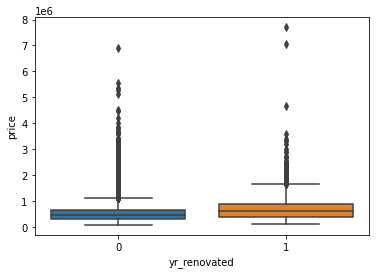

In [65]:
sns.boxplot(x='yr_renovated',y='price',data=data_new)
## There is a slight significance that renovated room has slight high price

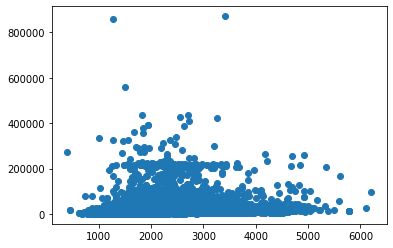

In [66]:
plt.scatter(data_new['living_measure15'],data_new['lot_measure15'])
##There is absolutely no relation

0.584247209924371

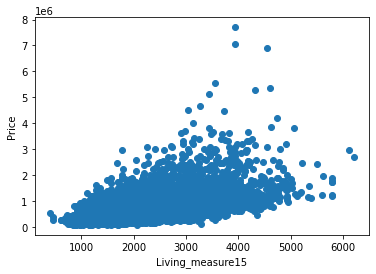

In [67]:
plt.scatter(data_new['living_measure15'],data_new['price'])
plt.xlabel('Living_measure15')
plt.ylabel('Price')
## Price increases as living_measure increases
corr2=data_new['living_measure15'].corr(data_new['price'])
corr2
## Price increases as living_measure increases

0.08181101198562439

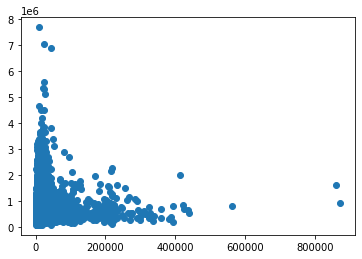

In [68]:
plt.scatter(data_new['lot_measure15'],data_new['price'])
## Price is independent on lot_measure15
####Can we drop lot_measure15
corr2=data_new['lot_measure15'].corr(data_new['price'])
corr2

In [69]:
data_new=data_new.drop("lot_measure15",axis=1);##Dropping off the lot_measure15 column as Absolutely no correlation

In [70]:
data_new.head(1)

,cid,dayhours,price,room_bed,room_bath,living_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_renovated,zipcode,lat,long,living_measure15,furnished,total_area,month_year
0,3034200666,2014-11-07,808100,4,3.25,3020,1.0,0,0,5,9,3020,0,0,98133,47.7174,-122.336,2120,1,16477,November-2014


0.7016507541567069

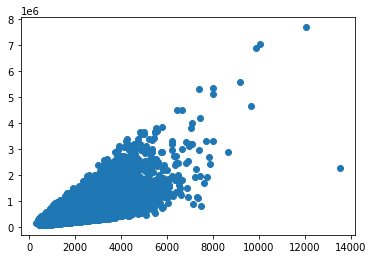

In [71]:
plt.scatter(data_new['living_measure'],data_new['price'])
## Price increases as living_measure increases
corr2=data_new['living_measure'].corr(data_new['price'])
corr2
## Price increases as living_measure increases

0.10378080093107722

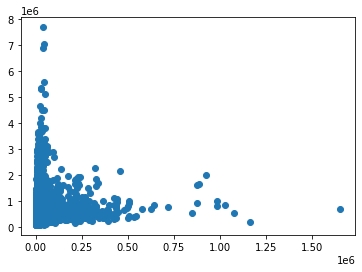

In [72]:
plt.scatter(data_new['total_area'],data_new['price'])
## Price increases as living_measure increases
corr2=data_new['total_area'].corr(data_new['price'])
corr2
## Price increases as living_measure increases

In [73]:
## Drop the cid coloum in furthur analysis as its just a significant for identifications
data_new= data_new.drop("lat",axis=1)
data_new= data_new.drop("long",axis=1)

In [74]:
data_new= data_new.drop("cid",axis=1) # As this column is just for indications

In [75]:
data_new= data_new.drop("dayhours",axis=1) # As this column has very poor correlation

In [76]:
data_new.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'ceil', 'coast',
       'sight', 'condition', 'quality', 'ceil_measure', 'basement',
       'yr_renovated', 'zipcode', 'living_measure15', 'furnished',
       'total_area', 'month_year'],
      dtype='object')

In [77]:
data.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [78]:
##We need to convert month_year column to some specific dummy